<a href="https://colab.research.google.com/github/chandukarreddy789/Sparks-Foundation-GRIP-Tasks/blob/main/GRIP_Task2_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task-**2**
##### KMeans Clustering on Iris dataset

In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
# Reading dataset into dataframe

df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Checking unique values in dataset

df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Converting the categorical values into numbers (Label Encoding)

df.Species = np.where(df.Species == 'Iris-setosa', 0 ,np.where(df.Species == 'Iris-versicolor', 1, 2))
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
# Separating dependent and independent variables

x = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,5]

In [ ]:
k = range(1,10)
sme = []
for i in k:
  km = KMeans(n_clusters = i)
  km.fit_predict(x)
  sme.append(km.inertia_)

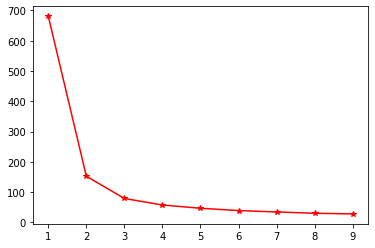

In [ ]:
#  Plotting 

plt.plot(k, sme, '*-', color = 'red')

In [ ]:
#cluster_size = 3
km = KMeans(n_clusters = 3)
ykm = km.fit_predict(x)

In [ ]:
centroids = km.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

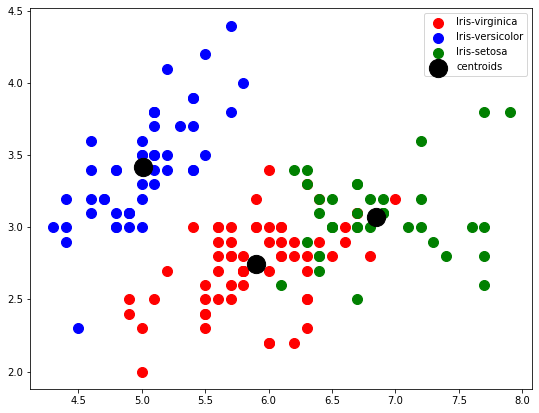

In [ ]:
# Ploting clusters and centroids of each clusters

plt.figure(figsize=(9,7))
plt.scatter(x[ykm == 0,0], x[ykm == 0,1], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(x[ykm == 1,0], x[ykm == 1,1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[ykm == 2,0], x[ykm == 2,1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(centroids[:,0], centroids[:,1], s = 333, c = 'k', label = 'centroids')
plt.legend()